**Importing the libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

**Reading the dataset**

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

**Exploratory Data Analysis**

In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0
1,1466964,1.0,55.0,1993.0,136.83,135.83,0.0,0.0,270.0
2,1346989,1.0,55.0,2539.0,134.86,135.86,0.0,0.0,189.0
3,1338232,1.0,55.0,2139.0,339.50,437.53,0.0,0.0,54.0
4,1448490,1.0,55.0,2631.0,243.50,242.50,0.0,0.0,40.0


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103621 entries, 0 to 103620
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     103621 non-null  int64  
 1   week                   103620 non-null  float64
 2   center_id              103620 non-null  float64
 3   meal_id                103620 non-null  float64
 4   checkout_price         103620 non-null  float64
 5   base_price             103620 non-null  float64
 6   emailer_for_promotion  103620 non-null  float64
 7   homepage_featured      103620 non-null  float64
 8   num_orders             103620 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.1 MB


In [8]:
train['num_orders'].describe()

count    103620.000000
mean        261.858483
std         433.910688
min          13.000000
25%          54.000000
50%         136.000000
75%         323.000000
max       24299.000000
Name: num_orders, dtype: float64

**Checking for Null Values**

In [9]:
train.isnull().sum()

id                       0
week                     1
center_id                1
meal_id                  1
checkout_price           1
base_price               1
emailer_for_promotion    1
homepage_featured        1
num_orders               1
dtype: int64

**Reading and Merging .csv files**

In [11]:
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [13]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560.0,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
1,1018704.0,2.0,55.0,1885.0,135.83,152.29,0.0,0.0,323.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
2,1196273.0,3.0,55.0,1885.0,132.92,133.92,0.0,0.0,96.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
3,1116527.0,4.0,55.0,1885.0,135.86,134.86,0.0,0.0,163.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
4,1343872.0,5.0,55.0,1885.0,146.50,147.50,0.0,0.0,215.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0


**Dropping Columns**

In [14]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560.0,1.0,136.83,152.29,0.0,0.0,177.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
1,1018704.0,2.0,135.83,152.29,0.0,0.0,323.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
2,1196273.0,3.0,132.92,133.92,0.0,0.0,96.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
3,1116527.0,4.0,135.86,134.86,0.0,0.0,163.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
4,1343872.0,5.0,146.50,147.50,0.0,0.0,215.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0


In [15]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [16]:
cols=cols[:2]+cols[9:]+cols[7:9]+cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [18]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                       float64
week                     float64
city_code                float64
region_code              float64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion    float64
homepage_featured        float64
num_orders               float64
dtype: object

**Label Encoding**

In [20]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb1 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

lb1 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [21]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560.0,1.0,647.0,56.0,2,2.0,0,3,136.83,152.29,0.0,0.0,177.0
1,1018704.0,2.0,647.0,56.0,2,2.0,0,3,135.83,152.29,0.0,0.0,323.0
2,1196273.0,3.0,647.0,56.0,2,2.0,0,3,132.92,133.92,0.0,0.0,96.0
3,1116527.0,4.0,647.0,56.0,2,2.0,0,3,135.86,134.86,0.0,0.0,163.0
4,1343872.0,5.0,647.0,56.0,2,2.0,0,3,146.50,147.50,0.0,0.0,215.0


In [22]:
trainfinal.shape

(103624, 13)

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distribution')

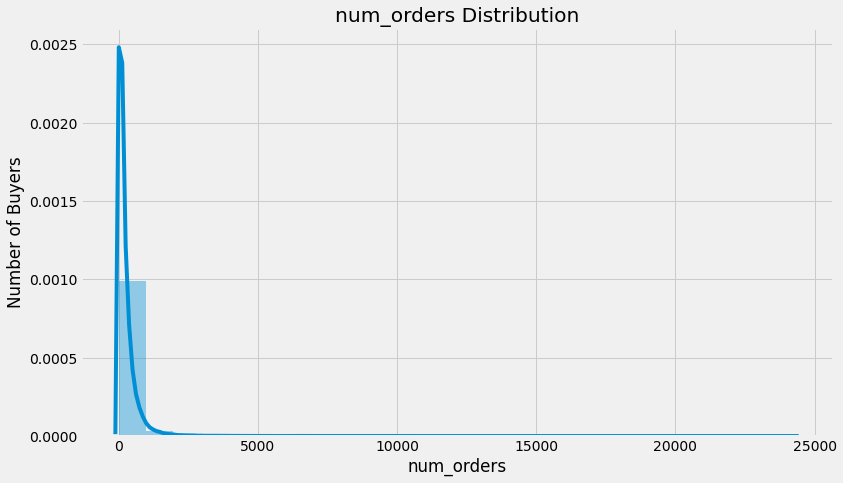

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins=25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [24]:
trainfinal2 = trainfinal.drop(['id'],axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

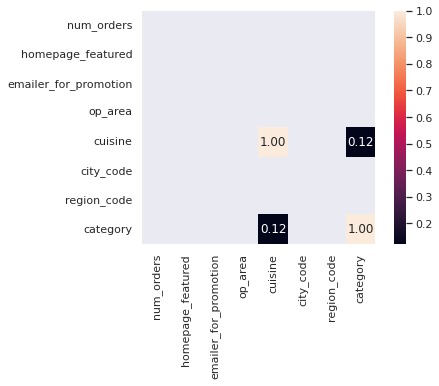

In [25]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

**Splitting the Dataset into Dependent and Independent variable**

In [27]:
features =  columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values

In [28]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0.0,0.0,2.0,3,647.0,56.0,0
1,0.0,0.0,2.0,3,647.0,56.0,0
2,0.0,0.0,2.0,3,647.0,56.0,0
3,0.0,0.0,2.0,3,647.0,56.0,0
4,0.0,0.0,2.0,3,647.0,56.0,0


**Split the dataset into train set and test set**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)